In [1]:
import json
import requests
import pandas as pd
from pandas.io.json import json_normalize


In [2]:
#We considere de following stock
#I chose the action that ares most popular in structured notes of the bank of Bancomer and Scotiabank
suby = ['NFLX','AAPL','TSLA','BMRN','MRNA','UBER','AMZN-MM','CNC','NVDA','FDX']

In [3]:
#I used de api iexapis 
n = 'VIXY-MM'
url = url=f'https://sandbox.iexapis.com/stable/stock/{n}/chart/1m?token=Tpk_12408ef88e28400f845e4acea5dd0f6e'
response = requests.get(url)
res_j = response.json()
res_j[0].keys()
data = pd.DataFrame(res_j)
data1 = data[['date','fClose']]
df_new = data1.rename(columns={'fClose': f'{n}'})




In [4]:
#Request, in this proyect we only considere de closing price of the last 30 days
for i in suby:
    url=f'https://sandbox.iexapis.com/stable/stock/{i}/chart/1m?token=Tpk_12408ef88e28400f845e4acea5dd0f6e'
    response = requests.get(url)
    res_j = response.json()
    data = pd.DataFrame(res_j)

    data_ca = data.copy()
    data_ca=  data[['fClose']]
    data_ca = data_ca.rename(columns={'fClose': f'{i}'})

    df_ori= pd.concat([df_new, data_ca], axis=1,)
    df_new = df_ori
df_new    



,date,VIXY-MM,NFLX,AAPL,TSLA,BMRN,MRNA,UBER,AMZN-MM,CNC,NVDA,FDX
0,2021-02-22,262.90,558.72,127.00,725.70,82.91,160.10,57.32,68816.37,60.81,587.9299,259.8501
1,2021-02-23,269.00,547.52,126.24,715.60,83.70,150.91,58.00,65872.48,60.20,583.6582,261.1433
2,2021-02-24,259.86,563.88,128.08,753.50,84.88,146.76,56.39,67013.60,61.66,604.8111,271.5202
3,2021-02-25,299.00,559.00,125.21,685.24,83.02,152.40,52.17,66720.00,61.12,537.0142,258.5425
4,2021-02-26,293.94,562.91,123.16,708.40,78.77,158.78,52.24,67203.26,60.46,566.5958,253.9296
5,2021-03-01,276.38,567.79,128.36,726.66,82.24,160.70,56.30,65082.59,61.14,573.7930,263.9954
6,2021-03-02,248.59,556.92,125.13,718.42,78.66,148.85,55.38,65972.00,60.32,538.2430,266.0358
7,2021-03-03,256.40,541.60,125.26,663.80,79.31,137.46,57.43,64717.26,61.60,522.2484,265.1630
8,2021-03-04,283.01,516.04,121.59,624.56,79.94,137.60,53.59,64009.12,60.03,512.4338,251.9300
9,2021-03-05,281.12,529.87,125.64,619.87,81.00,134.32,56.23,66508.68,62.38,512.5780,261.8100


In [5]:

df_new.dropna()
df_new =df_new.drop(['VIXY-MM'], axis=1)


In [6]:
##Obtained the most important statistics indicators considering the last month of closing prices
#
df1 = df_new.copy()

df1 = df_new.agg(['mean', 'min','max','std','var','median','skew','kurt'])
#,'median','mode','skew','kurt'


df1 = df1.round(2)
df1

,NFLX,AAPL,TSLA,BMRN,MRNA,UBER,AMZN-MM,CNC,NVDA,FDX
mean,537.57,125.17,689.93,80.19,145.80,57.07,65886.22,62.78,538.98,266.99
min,509.70,119.40,585.00,76.66,124.15,52.17,62711.90,60.03,481.95,251.77
max,567.79,128.56,753.50,84.88,160.70,61.84,68816.37,66.07,604.81,282.74
std,18.57,2.39,41.62,2.21,10.14,2.76,1403.82,2.12,30.87,9.44
var,344.70,5.72,1732.15,4.89,102.82,7.64,1970716.62,4.50,952.89,89.18
median,530.99,125.24,699.82,79.69,147.06,56.94,65972.00,62.14,535.92,265.60
skew,0.29,-0.54,-1.05,0.58,-0.32,-0.14,-0.32,0.26,0.51,-0.03
kurt,-1.38,0.41,1.04,-0.41,-0.44,-0.61,0.60,-1.54,0.01,-1.01


In [7]:
import numpy as np
df_new1 = df_new.copy()
f'{suby[1]}'
#plt.plot(df_new['date'],df_new[f'{suby[1]}'])

df_new1["date"].replace((np.inf, -np.inf, np.nan), 0, inplace=True)
#df_new1['VIXY-MM','NFLX','AAPL','TSLA','BMRN','MRNA','UBER','AMZN-MM','CNC','NVDA','FDX'].astype(int)
df_new1.dtypes
df_new[f'{suby[1]}']

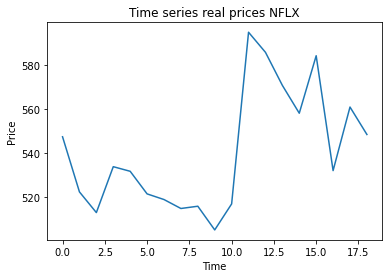

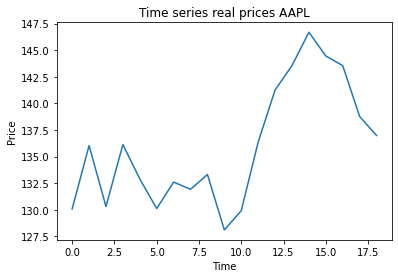

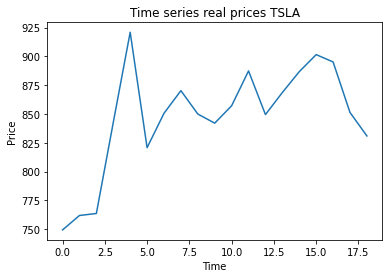

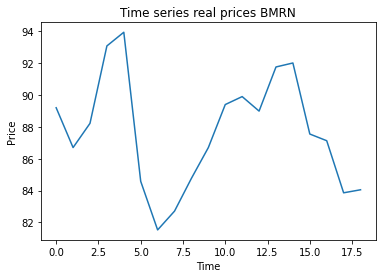

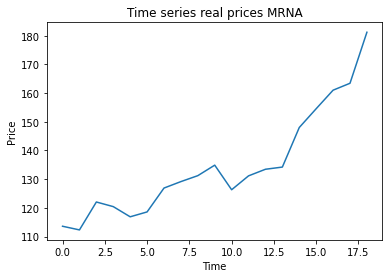

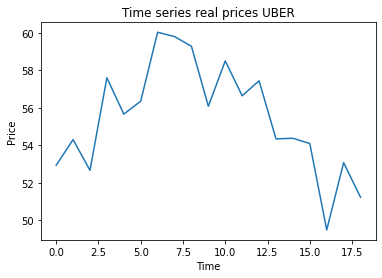

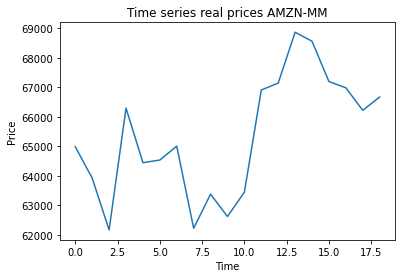

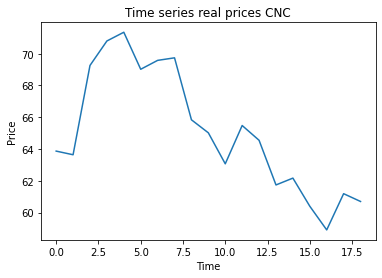

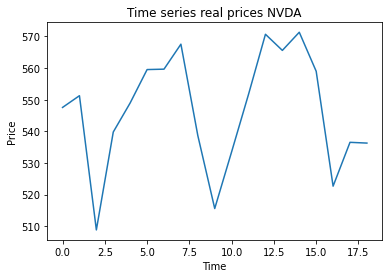

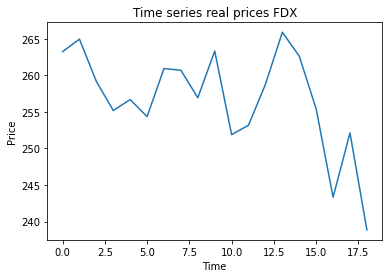

In [9]:
#Times series is presented for each action
import matplotlib as mpl
import matplotlib.pyplot as plt



for i in range(len(suby)):
    da = list(df_new['date'])    
    li =  list(df_new[f'{suby[i]}'])
    plt.figure()
    plt.plot(li)
    plt.title('Time series real prices ' + suby[i])
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.show()
   

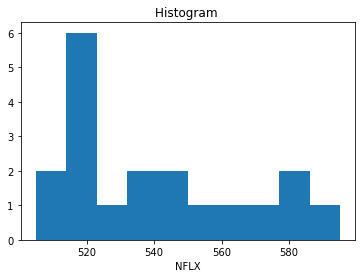

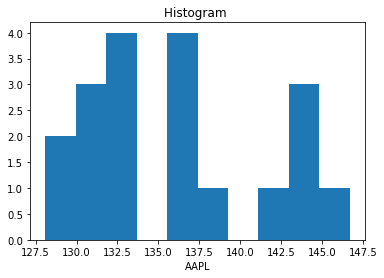

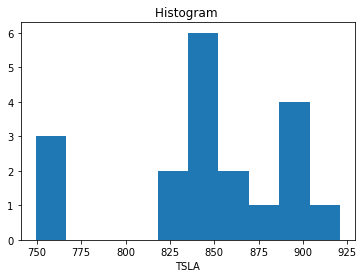

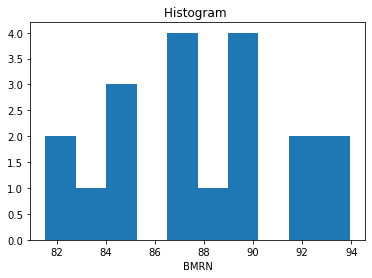

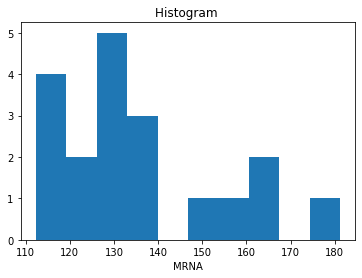

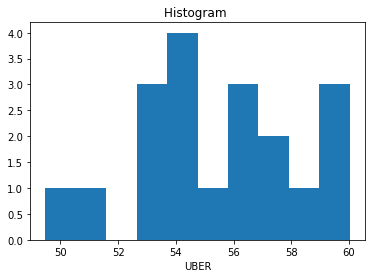

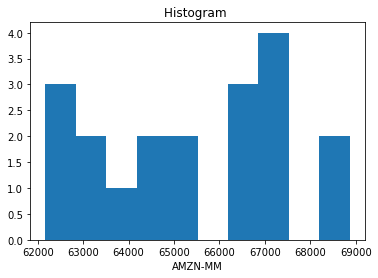

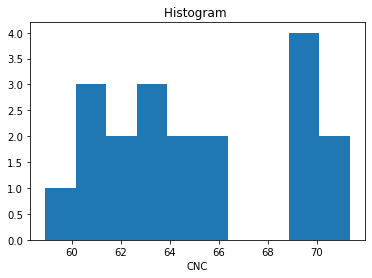

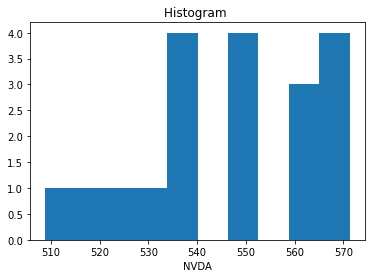

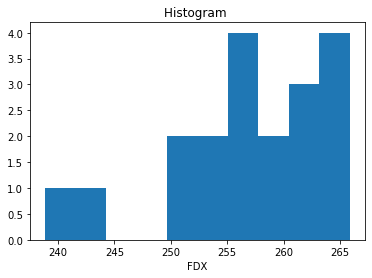

In [10]:
#The Histogram of each action, represent the frequency of the price in a month
for i in range(len(suby)):
    plt.figure()
    li =list (df_new[f'{suby[i]}'])
    plt.hist(li)
    plt.title('Histogram ' )
    plt.xlabel(f'{suby[i]}')
    plt.show()

In [11]:
import re
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd

In [12]:
suby = ['NFLX','AAPL','TSLA','BMRN','MRNA','UBER','AMZN-MM','CNC','NVDA','FDX']
suby1 = ['Netflix','Apple','Tesla,_Inc.','BioMarin_Pharmaceutical','BioMarin_Pharmaceutical','Uber','Amazon_(company)','Centene_Corporation','Nvidia','FedEx']

len(suby1)

10

In [13]:
#Finally I used web scraping  to obtain the International Security Identification Number (ISIN) of the actions, which uniquely
#identifies the action

l = []
isinl = []
urlsa =[]
for i in range(len(suby1)):
    url = f'https://es.wikipedia.org/wiki/{suby1[i]}'
    urlsa.append(url)


for url in urlsa:
         
        try:
            
            l =[]
            req = requests.get(url)       
            sopa = BeautifulSoup(req.content, 'html.parser')
            imagen = sopa.find_all('tr')
            for name in imagen:
                l.append(name.get_text())
            if 'ISIN' in  l[5]:  
                isin = l[5].replace('ISIN\n','')
            else:
                isin = 'Not found'
            isinl.append(isin)
            
            
        except:
              print(url)    
              pass
isinl 

['US64110L1061',
 'US0378331005',
 'US88160R1014',
 'Not found',
 'Not found',
 'US90353T1007',
 'Not found',
 'Not found',
 'US67066G1040',
 'US31428X1063']

In [14]:
import numpy as np
isi = np.transpose(isinl)
isi = [list(list(isi))]

In [15]:
dfNew = pd.DataFrame(isi, columns = ['NFLX','AAPL','TSLA','BMRN','MRNA','UBER','AMZN-MM','CNC','NVDA','FDX'])
dfNew

,NFLX,AAPL,TSLA,BMRN,MRNA,UBER,AMZN-MM,CNC,NVDA,FDX
0,US64110L1061,US0378331005,US88160R1014,Not found,Not found,US90353T1007,Not found,Not found,US67066G1040,US31428X1063


In [16]:
ori =df1.copy()
df=ori.append(dfNew,ignore_index=False)
df
df.rename(index={0:'isin'}, inplace=True)
df

,NFLX,AAPL,TSLA,BMRN,MRNA,UBER,AMZN-MM,CNC,NVDA,FDX
mean,540.88,135.95,847.44,87.69,134.7,55.47,65348.3,65.07,546.58,256.71
min,504.97,128.1,749.39,81.53,112.31,49.48,62169.6,58.91,508.85,238.87
max,595.1,146.69,921.02,93.94,181.2,60.03,68868,71.35,571.34,265.88
std,27.85,5.69,47.06,3.55,18.75,2.93,2060.39,3.87,18.23,6.99
var,775.55,32.39,2214.9,12.59,351.5,8.56,4.2452e+06,14.97,332.5,48.88
median,532.01,136.03,850.65,87.55,131.15,55.66,65008.7,64.55,549,256.93
skew,0.67,0.5,-0.81,0.07,1.09,-0.17,-0,0.23,-0.51,-1.1
kurt,-0.81,-0.98,0.29,-0.81,0.65,-0.53,-1.05,-1.22,-0.45,1.35
isin,US64110L1061,US0378331005,US88160R1014,Not found,Not found,US90353T1007,Not found,Not found,US67066G1040,US31428X1063


In [18]:
import os 
path = os.getcwd()
os.makedirs('./Proyecto/')
os.chdir('./Proyecto')
s = df.to_csv('ACCIONES.csv', sep= ' ' , index=False)